# Stock Market Prediction using Decision Tree

In this notebook I take a look at stock market prediction using decision tree and linear regression.

# Importing Libraries

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Using data from Apple's stock.
df = pd.read_csv(r"D:\project\NSE-TATAGLOBAL11.csv") 

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [6]:
df.shape

(1235, 8)


# EDA

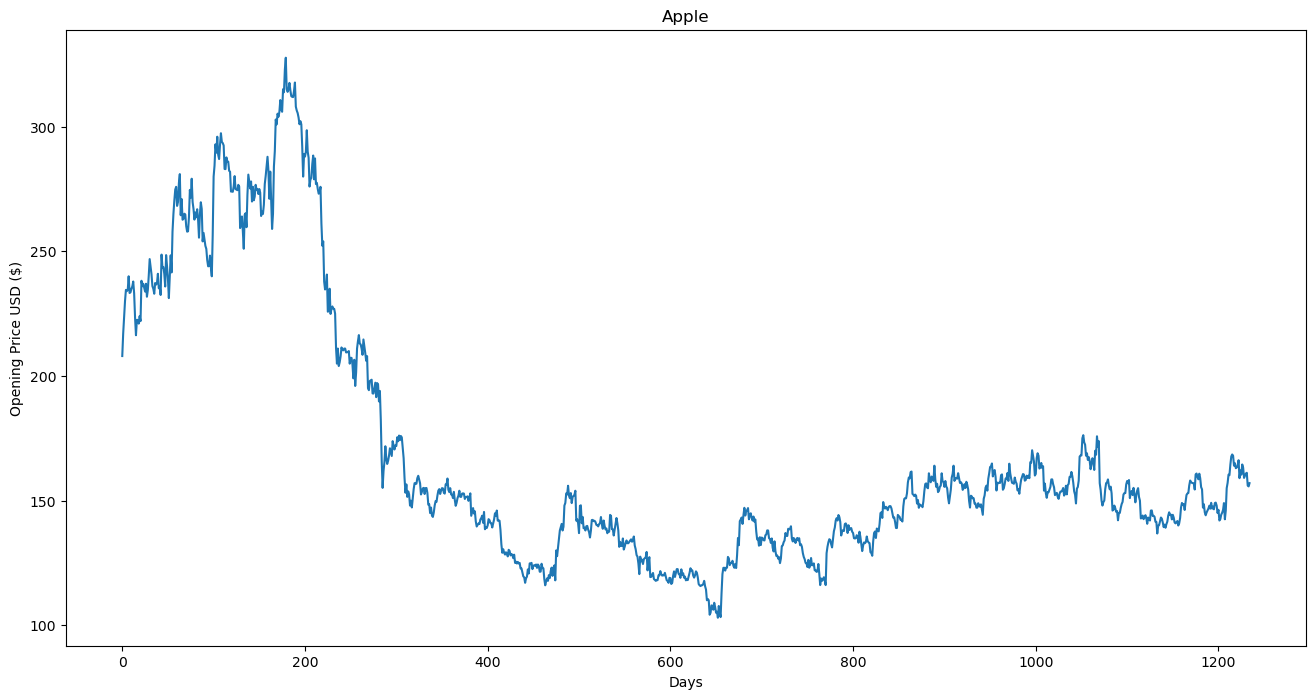

In [7]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

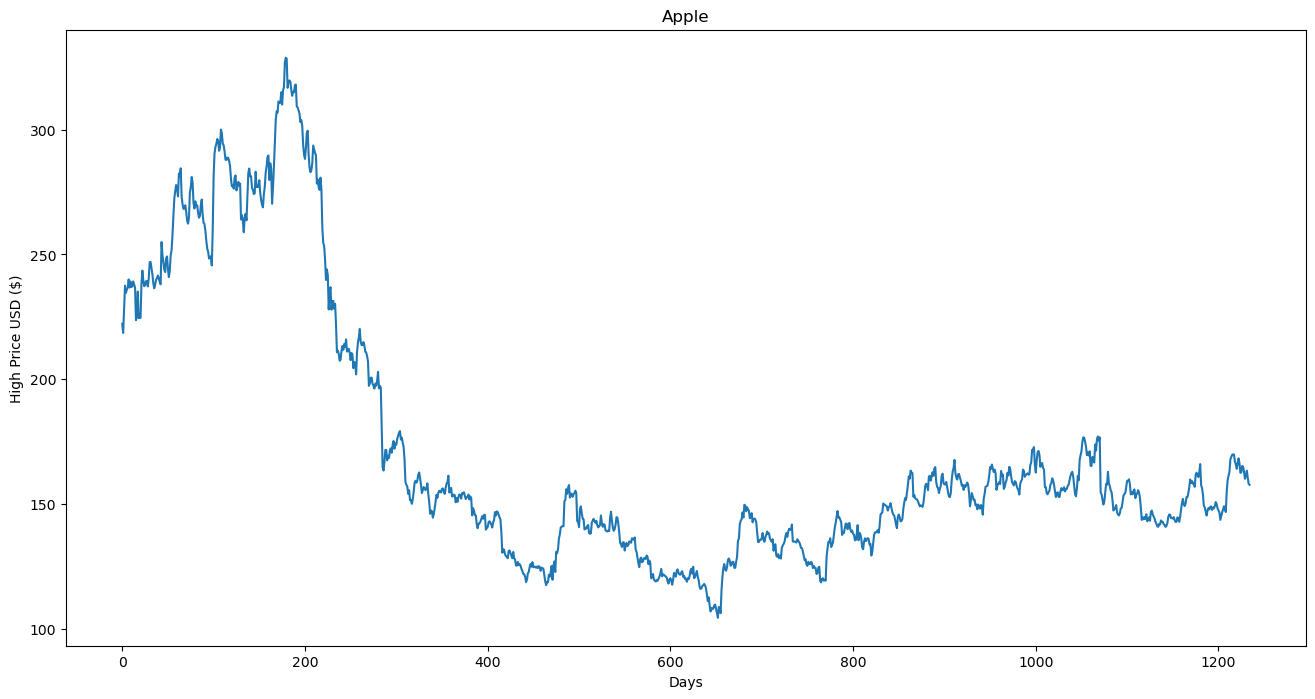

In [8]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

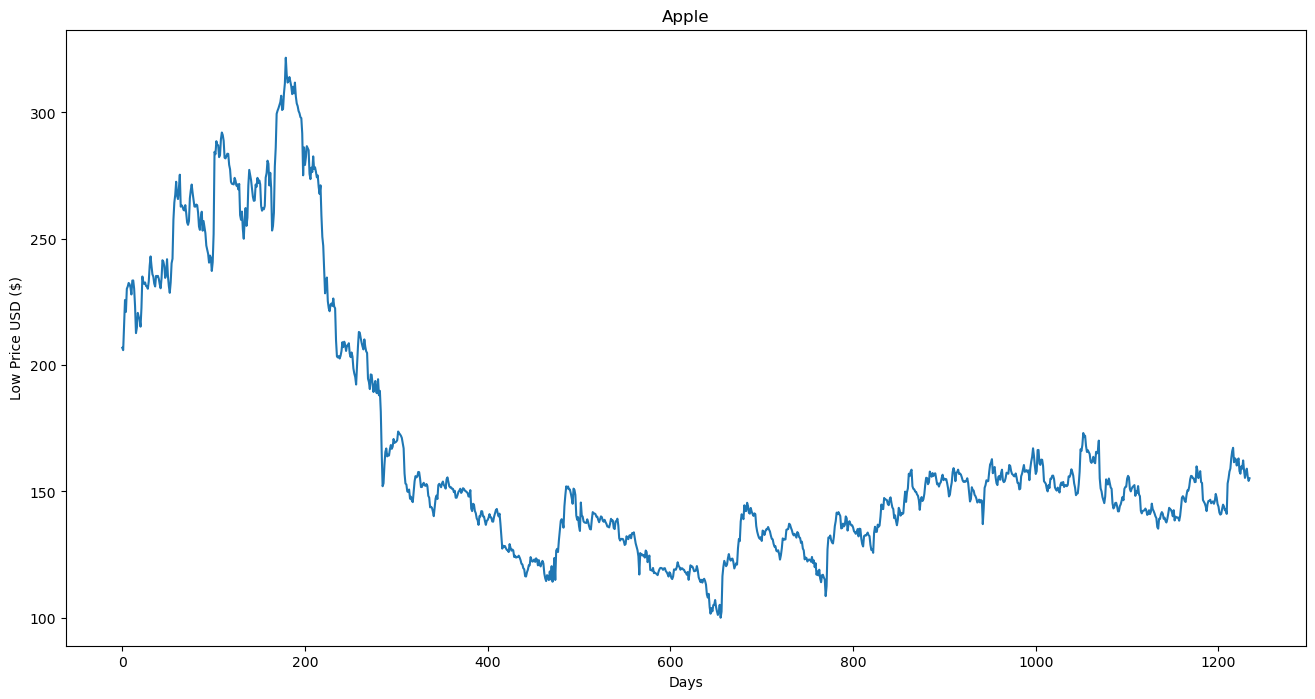

In [9]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

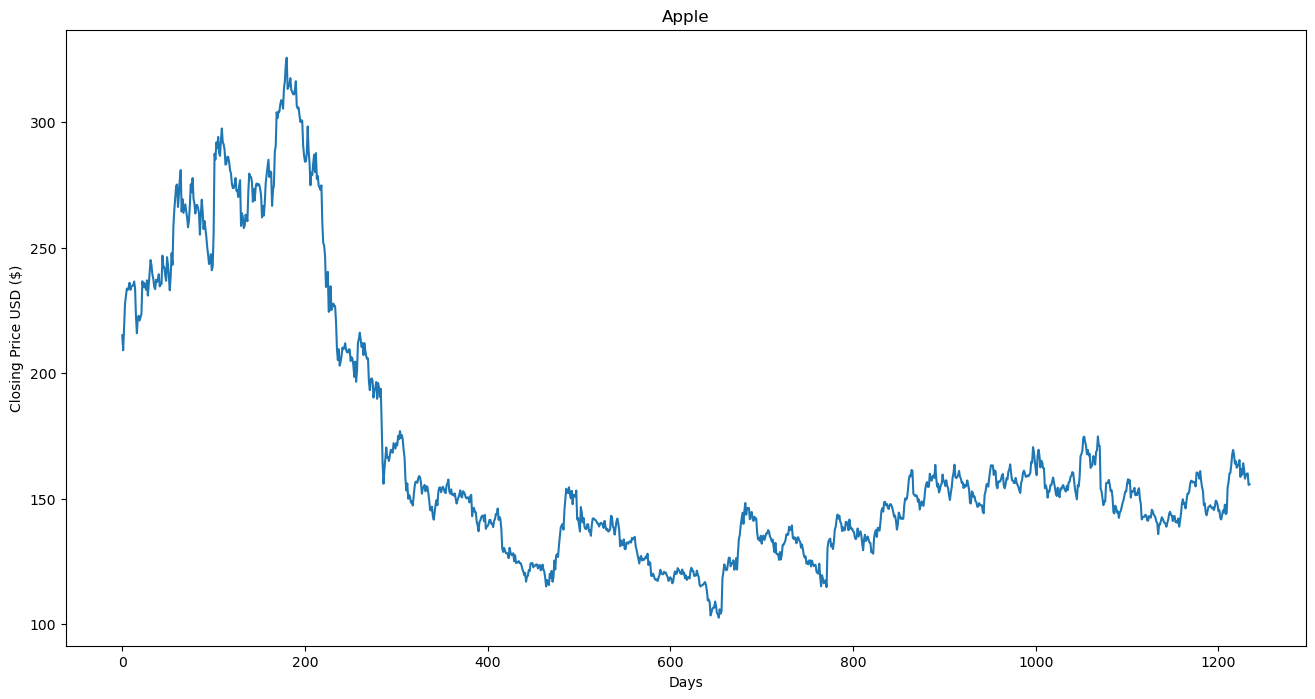

In [10]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [11]:
df2 = df['Close']

In [12]:

df2.tail()

1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, dtype: float64

In [13]:
df2 = pd.DataFrame(df2)     

In [14]:
df2.tail()

,Close
1230,159.45
1231,160.05
1232,160.15
1233,155.55
1234,155.80


In [15]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [16]:
df2.tail()

,Close,Prediction
1230,159.45,NaN
1231,160.05,NaN
1232,160.15,NaN
1233,155.55,NaN
1234,155.80,NaN


In [17]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [140.9 ]
 [140.4 ]
 [135.95]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11184\1853731690.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [18]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[255.9  287.5  285.25 ... 160.15 155.55 155.8 ]




# Linear and Decision Tree Regression

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [21]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [22]:
y_pred = lr.predict(x_test)
accuracy= lr.score(x_test,y_test)
print(accuracy)

0.5513528081826904


In [23]:
pred = tree.predict(x_train)
acc = tree.score(x_test,y_test)
print(acc)

0.6195281493734361


In [24]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11184\1876488320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[153.5 ],
       [156.55],
       [156.8 ],
       [158.7 ],
       [159.2 ],
       [160.65],
       [160.35],
       [157.2 ],
       [153.75],
       [151.8 ],
       [149.8 ],
       [155.45],
       [154.95],
       [158.7 ],
       [167.05],
       [167.85],
       [169.2 ],
       [174.35],
       [174.8 ],
       [172.75],
       [171.1 ],
       [167.8 ],
       [169.5 ],
       [167.3 ],
       [167.95],
       [162.35],
       [162.9 ],
       [163.55],
       [167.05],
       [166.  ],
       [163.7 ],
       [168.65],
       [169.35],
       [174.85],
       [171.2 ],
       [171.1 ],
       [154.05],
       [153.  ],
       [150.3 ],
       [147.5 ],
       [149.1 ],
       [148.9 ],
       [156.25],
       [156.4 ],
       [156.45],
       [157.55],
       [155.55],
       [153.1 ],
       [153.45],
       [150.7 ],
       [144.75],
       [144.2 ],
       [147.3 ],
       [146.4 ],
       [144.55],
       [145.  ],
       [142.45],
       [144.6 ],
       [145.1 

In [25]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[155.25       148.15       134.825      148.75       142.
 141.1        146.7        140.2        123.85       118.6
 141.75       142.86666667 134.75       148.75       148.3
 141.15       143.35       143.15       140.7        141.
 157.25       142.15       138.95       141.35       144.25
 148.2        149.85       153.35       148.3        143.55
 153.         152.05       138.95       152.9        155.95
 157.25       120.325      140.625      156.8        149.375
 154.95       160.5        123.4        159.8        142.85
 159.         150.925      151.2        153.1        147.5
 132.6        144.75       150.45       143.65       138.43333333
 147.         121.1        138.43333333 146.2        146.65
 143.75       131.225      133.9        135.075      150.2375
 145.05       155.51666667 142.025      144.65       137.175
 135.375      123.175      151.2        137.5        157.75
 154.55       159.55       155.25       156.275      142.75
 147.2        169.5        141.575   

In [26]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[150.5333272  152.48730688 152.64746915 153.86470239 154.18502692
 155.11396808 154.92177336 152.90372878 150.69348947 149.44422378
 148.16292563 151.7825929  151.46226836 153.86470239 159.21412215
 159.72664141 160.59151766 163.89086039 164.17915248 162.86582188
 161.8087509  159.69460896 160.78371239 159.37428442 159.79070632
 156.20307151 156.5554285  156.9718504  159.21412215 158.54144063
 157.06794776 160.23916067 160.68761502 164.21118493 161.87281581
 161.8087509  150.88568419 150.21300267 148.48325017 146.68943276
 147.71447128 147.58634146 152.29511216 152.39120952 152.42324197
 153.12795595 151.8466578  150.27706757 150.50129475 148.7395098
 144.92764781 144.57529082 146.56130295 145.98471878 144.79951799
 145.08781008 143.45415494 144.83155045 145.15187498 146.1769135
 147.23398447 147.93869845 149.12389924 150.11690531 150.18097021
 152.1990148  153.32015067 152.23104725 153.06389105 148.61137998
 150.24503512 150.0528404  150.27706757 151.10991137 149.2199966
 149.70048341

In [27]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11184\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


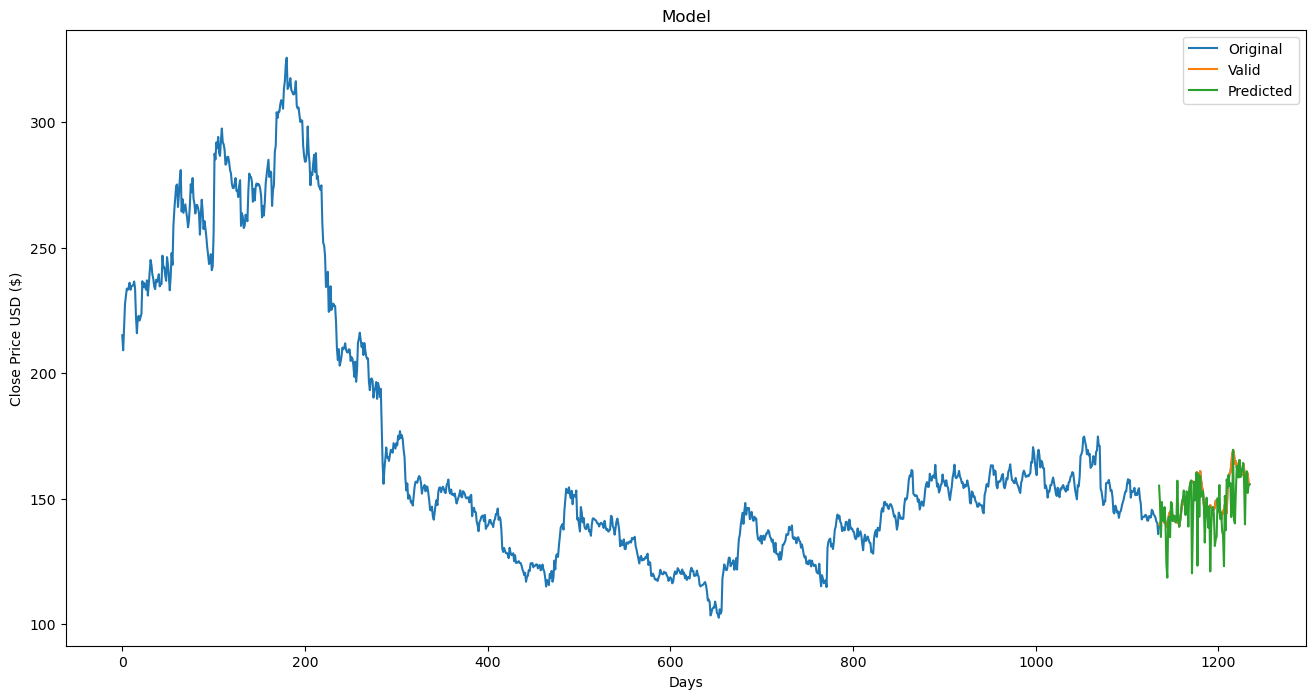

In [28]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [30]:
#pip install keras

In [31]:
#pip install tensorflow

In [32]:
data1 = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data1)):
    new_data['Date'][i] = data1['Date'][i]
    new_data['Close'][i] = data1['Close'][i]

In [33]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [34]:
#split the train and test sets
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]


In [35]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [36]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.50425818],
        [0.47758853],
        [0.51792918],
        ...,
        [0.72859704],
        [0.7492156 ],
        [0.77140296]],

       [[0.47758853],
        [0.51792918],
        [0.56006275],
        ...,
        [0.7492156 ],
        [0.77140296],
        [0.77364411]],

       [[0.51792918],
        [0.56006275],
        [0.57485433],
        ...,
        [0.77140296],
        [0.77364411],
        [0.73352757]],

       ...,

       [[0.23576871],
        [0.24518153],
        [0.23733752],
        ...,
        [0.23330345],
        [0.22725235],
        [0.22277006]],

       [[0.24518153],
        [0.23733752],
        [0.22882116],
        ...,
        [0.22725235],
        [0.22277006],
        [0.24092335]],

       [[0.23733752],
        [0.22882116],
        [0.20528911],
        ...,
        [0.22277006],
        [0.24092335],
        [0.24585388]]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
927/927 [==============================] - 48s 44ms/step - loss: 0.0040 - accuracy: 0.0022
Epoch 2/50
927/927 [==============================] - 43s 46ms/step - loss: 0.0015 - accuracy: 0.0022
Epoch 3/50
927/927 [==============================] - 40s 43ms/step - loss: 0.0011 - accuracy: 0.0022
Epoch 4/50
927/927 [==============================] - 28s 30ms/step - loss: 8.5787e-04 - accuracy: 0.0022
Epoch 5/50
927/927 [==============================] - 27s 29ms/step - loss: 8.0049e-04 - accuracy: 0.0022
Epoch 6/50
927/927 [==============================] - 27s 29ms/step - loss: 7.3513e-04 - accuracy: 0.0022
Epoch 7/50
927/927 [==============================] - 27s 29ms/step - loss: 8.2240e-04 - accuracy: 0.0022
Epoch 8/50
927/927 [==============================] - 28s 30ms/step - loss: 6.5590e-04 - accuracy: 0.0022
Epoch 9/50
927/927 [==============================] - 29s 31ms/step - loss: 5.9999e-04 - accuracy: 0.0022
Epoch 10/50
561/927 [=================>............] - ETA

In [ ]:
model.summary()

In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
inputs

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
closing_price

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show